In [5]:
# Packages:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from urllib.request import urlopen
import json
import datetime
import numpy as np
import warnings
from textblob import TextBlob
import re
from wordcloud import WordCloud
import seaborn as sns
import scipy.stats as st
import scipy
from scipy import stats
import statsmodels.api as sm

In [3]:
df = pd.read_csv('../data/processed/dorsey_cleaned.csv')
df.head()

,Date,Price,Price_scaled,Price_delta,Tweets,Agg_count,Agg_retweet,Agg_favorite,Subjectivity_mean,Polarity_mean,Polarity_scaled,Polarity_delta,Favorite_scaled,Retweet_scaled
0,2019-02-06,72.669998,0.141884,NaN,Huh I believe so Thank youI love . It’s com...,77.0,1930.0,15392.0,0.230986,0.103379,0.402253,0.000000,0.019931,0.000831
1,2019-02-07,71.949997,0.138930,-0.002954,! G N I Z a M A You’re amazing! Progress I do...,12.0,1589.0,3275.0,0.075000,0.062500,0.375000,-0.027253,0.004241,0.000684
2,2019-02-08,73.489998,0.145249,0.006319,Live tweeting Live tweets. Anything a tweet ...,25.0,26212.0,3499.0,0.260192,0.066232,0.377488,0.002488,0.004531,0.011283
3,2019-02-11,74.320000,0.148654,0.003406,True Thanks! Maybe an error Good thing we ha...,27.0,4894.0,6075.0,0.242670,0.191647,0.461098,0.083610,0.007866,0.002107
4,2019-02-12,75.589996,0.153865,0.005211,"Go eat! Thanks, Kara karajack I don’t think y...",60.0,1084.0,9440.0,0.397864,0.131205,0.420803,-0.040295,0.012224,0.000467


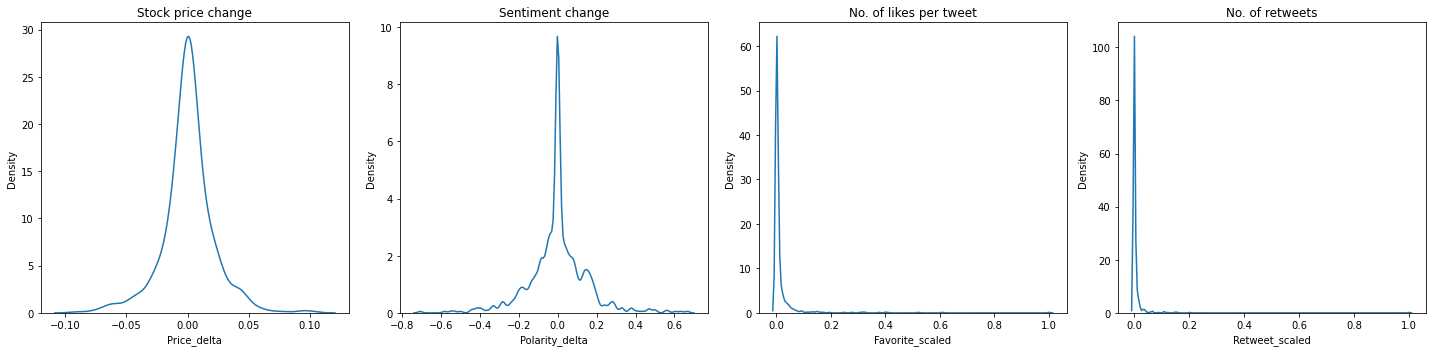

In [6]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (20, 5))

sns.kdeplot(ax=ax1, x=df['Price_delta'], bw_adjust=1).set_title('Stock price change')
sns.kdeplot(ax=ax2, x=df['Polarity_delta'], bw_adjust=0.27).set_title('Sentiment change')
sns.kdeplot(ax=ax3, x=df['Favorite_scaled'], bw_adjust=0.27).set_title('No. of likes per tweet')
sns.kdeplot(ax=ax4, x=df['Retweet_scaled'], bw_adjust=0.27).set_title('No. of retweets')

plt.tight_layout()

In [7]:
df.describe()

,Price,Price_scaled,Price_delta,Agg_count,Agg_retweet,Agg_favorite,Subjectivity_mean,Polarity_mean,Polarity_scaled,Polarity_delta,Favorite_scaled,Retweet_scaled
count,711.000000,711.000000,710.000000,711.000000,7.110000e+02,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000
mean,142.862855,0.429890,0.000784,4.496484,1.472513e+04,12147.994374,0.231285,0.116547,0.351022,0.001147,0.015730,0.006338
std,78.912049,0.323782,0.021381,6.493522,9.539957e+04,48398.463371,0.212146,0.171806,0.197186,0.150795,0.062670,0.041064
min,38.090000,0.000000,-0.090965,0.000000,0.000000e+00,0.000000,0.000000,-0.500000,0.000000,-0.707071,0.000000,0.000000
25%,68.675003,0.125492,-0.007868,1.000000,6.050000e+01,0.000000,0.000000,0.000000,0.333333,-0.059154,0.000000,0.000026
50%,118.650002,0.330543,0.001087,3.000000,7.850000e+02,681.000000,0.228571,0.074254,0.382836,0.000000,0.000882,0.000338
75%,226.689995,0.773839,0.009058,6.000000,5.077500e+03,5547.000000,0.371415,0.197768,0.465179,0.063475,0.007183,0.002186
max,281.809998,1.000000,0.103069,77.000000,2.323213e+06,772272.000000,1.000000,1.000000,1.000000,0.666667,1.000000,1.000000


In [12]:
#from scipy.stats import boxcox

#df['transformed_return'], lam = boxcox(df["Return"])


In [8]:
numeric_df = df.filter(items=['Price_scaled','Price_delta', 'Polarity_delta', 'Favorite_scaled', 'Retweet_scaled'])
corr1 = numeric_df.corr()
corr2 = numeric_df.corr(method='spearman')

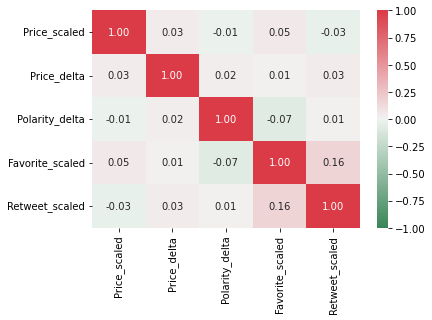

In [9]:
sns.heatmap(corr1, annot=True, cmap=sns.diverging_palette(140, 10, as_cmap=True), fmt='.2f', vmin=-1, vmax=1)
plt.show()

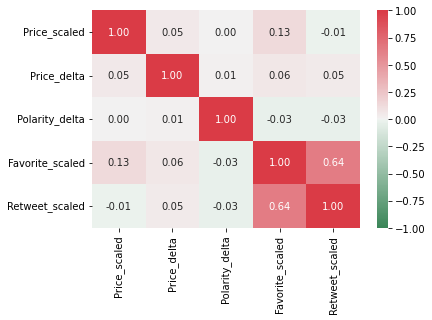

In [10]:
sns.heatmap(corr2, annot=True, cmap=sns.diverging_palette(140, 10, as_cmap=True), fmt='.2f', vmin=-1, vmax=1)
plt.show()

In [11]:
print("H0: the changes in stock market prices are similar on average compared to the changes in CEO's Twitter sentiment") 
print("H1: the changes in stock market prices are different on average compared to the changes in CEO's Twitter sentiment")

statistic = st.ttest_ind(df['Price_delta'], df['Polarity_delta'], axis=0, equal_var=False, alternative='two-sided', nan_policy='omit')[0]
pvalue = st.ttest_ind(df['Price_delta'], df['Polarity_delta'], axis=0, equal_var=False, alternative='two-sided', nan_policy='omit')[1]

print('statistic = ',statistic)
print('pvalue = ',pvalue)

if pvalue<= 0.05:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')
    

H0: the changes in stock market prices are similar on average compared to the changes in CEO's Twitter sentiment
H1: the changes in stock market prices are different on average compared to the changes in CEO's Twitter sentiment
statistic =  -0.06356911023481762
pvalue =  0.9493305285302163
We fail to reject the null hypothesis


C:\Users\Amalia\anaconda3\envs\dstoolkit\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


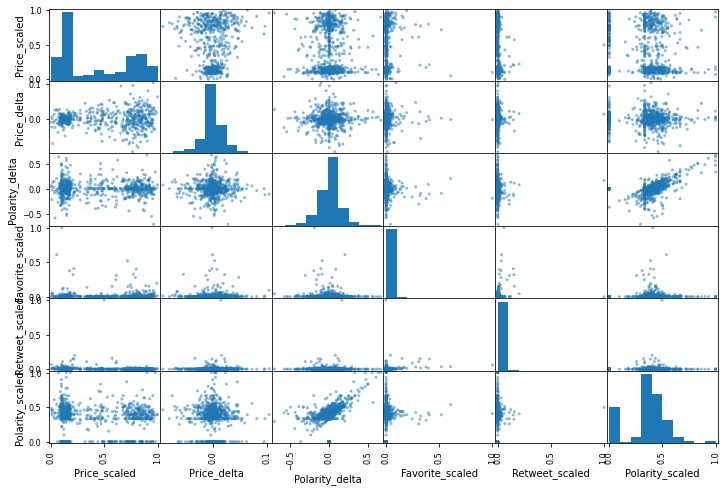

In [12]:
from pandas.plotting import scatter_matrix
df_sm = df[['Price_scaled','Price_delta', 'Polarity_delta','Favorite_scaled', 'Retweet_scaled', 'Polarity_scaled']]
df_sm.dropna(inplace=True)
scatter_matrix(df_sm, figsize=(12,8));

In [13]:
scipy.stats.shapiro(df_sm['Price_delta'])

ShapiroResult(statistic=0.9349048733711243, pvalue=4.8455677800539825e-17)

In [14]:
scipy.stats.shapiro(df_sm['Polarity_delta'])

ShapiroResult(statistic=0.9275050759315491, pvalue=5.1141934432096594e-18)

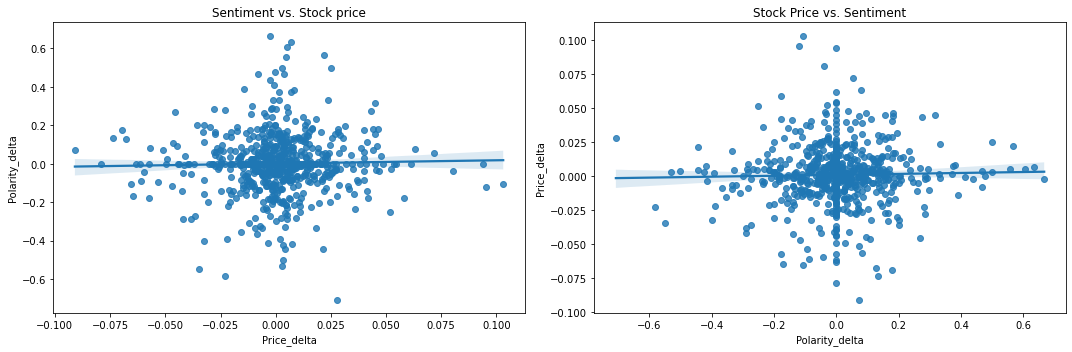

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 5))
sns.regplot(data = df_sm, x='Price_delta', y='Polarity_delta', lowess=False, ax=ax1).set(title='Sentiment vs. Stock price')
sns.regplot(data = df_sm, x='Polarity_delta', y='Price_delta', lowess=False, ax=ax2).set(title='Stock Price vs. Sentiment')

plt.tight_layout()

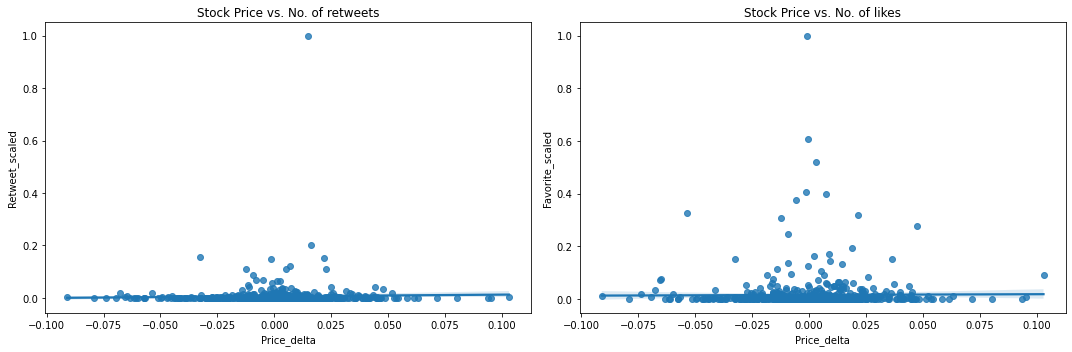

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 5))
sns.regplot(data = df_sm, x='Price_delta', y='Retweet_scaled', lowess=False, ax=ax1). set(title='Stock Price vs. No. of retweets')
sns.regplot(data = df_sm, x='Price_delta', y='Favorite_scaled', lowess=False, ax=ax2). set(title='Stock Price vs. No. of likes')

plt.tight_layout()

In [17]:
X = df_sm['Price_delta']
y = df_sm['Polarity_delta']

atm_const = sm.add_constant(X)


mod = sm.OLS(y, atm_const)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:         Polarity_delta   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.4150
Date:                Sun, 05 Dec 2021   Prob (F-statistic):              0.520
Time:                        11:32:17   Log-Likelihood:                 335.96
No. Observations:                 710   AIC:                            -667.9
Df Residuals:                     708   BIC:                            -658.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0010      0.006      0.179      

In [18]:
X = df_sm['Polarity_delta']
y = df_sm['Price_delta']

atm_const = sm.add_constant(X)


mod = sm.OLS(y, atm_const)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:            Price_delta   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.4150
Date:                Sun, 05 Dec 2021   Prob (F-statistic):              0.520
Time:                        11:32:50   Log-Likelihood:                 1723.4
No. Observations:                 710   AIC:                            -3443.
Df Residuals:                     708   BIC:                            -3434.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0008      0.001      0.

In [19]:
X = df_sm[['Favorite_scaled']]
y = df_sm['Price_delta']

atm_const = sm.add_constant(X)


mod = sm.OLS(y, atm_const)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:            Price_delta   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                   0.06167
Date:                Sun, 05 Dec 2021   Prob (F-statistic):              0.804
Time:                        11:32:52   Log-Likelihood:                 1723.2
No. Observations:                 710   AIC:                            -3442.
Df Residuals:                     708   BIC:                            -3433.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0007      0.001     

In [20]:
X = df_sm[['Retweet_scaled']]
y = df_sm['Price_delta']

atm_const = sm.add_constant(X)


mod = sm.OLS(y, atm_const)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:            Price_delta   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.7695
Date:                Sun, 05 Dec 2021   Prob (F-statistic):              0.381
Time:                        11:32:56   Log-Likelihood:                 1723.6
No. Observations:                 710   AIC:                            -3443.
Df Residuals:                     708   BIC:                            -3434.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0007      0.001      0.

In [21]:
X = df_sm[['Retweet_scaled', 'Polarity_delta', 'Favorite_scaled']]
y = df_sm['Price_delta']

atm_const = sm.add_constant(X)


mod = sm.OLS(y, atm_const)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:            Price_delta   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.3972
Date:                Sun, 05 Dec 2021   Prob (F-statistic):              0.755
Time:                        11:32:59   Log-Likelihood:                 1723.8
No. Observations:                 710   AIC:                            -3440.
Df Residuals:                     706   BIC:                            -3421.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0006      0.001     

In [22]:
X = df_sm[['Retweet_scaled', 'Polarity_delta', 'Favorite_scaled']]
y = df_sm['Price_delta']

atm_const = sm.add_constant(X)


mod = sm.OLS(y, atm_const)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:            Price_delta   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.3972
Date:                Sun, 05 Dec 2021   Prob (F-statistic):              0.755
Time:                        11:33:04   Log-Likelihood:                 1723.8
No. Observations:                 710   AIC:                            -3440.
Df Residuals:                     706   BIC:                            -3421.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0006      0.001     

In [23]:
X = df_sm[['Polarity_delta', 'Favorite_scaled']]
y = df_sm['Price_delta']

atm_const = sm.add_constant(X)


mod = sm.OLS(y, atm_const)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:            Price_delta   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.2509
Date:                Sun, 05 Dec 2021   Prob (F-statistic):              0.778
Time:                        11:33:08   Log-Likelihood:                 1723.4
No. Observations:                 710   AIC:                            -3441.
Df Residuals:                     707   BIC:                            -3427.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0007      0.001     